
# Unit Testing

Unit Tests is the phase where each unit of the system is tested individually. The purpose is to isolate each part of the system to verify that they are working as specified. It consists of checking the smallest unit of the software project.

The use of this type of test throughout the implementation is possible to reduce the amount of bugs in the application. Basically unit tests work by comparing the results of the functions to be tested with expected values.

The unit tests and automated tests are not primarily used to verify that a specific function is working correctly, but to ensure that after changes in the code base, your software continues to work.

## Example

You have just created a simple calculator class:

In [7]:
class Calculator:
  # constructor is empty 
  def __init__(self):
    pass
  
  # return the addition
  def add(self, n1, n2):
    return n1 + n2

  #return first value minus the second
  def subtract(self, n1, n2):
    return n1 - n2
  
  #return the multiplication
  def multiply(self, n1, n2):
    return n1 * n2

  #return first value divided by the second
  def divide(self, n1, n2):
    if n2 != 0:
      return n1/n2

Now, you will want to test that all methods are working as expected.  To do this, you will create your test class:

In [12]:
class CalculatorTestCase(unittest.TestCase): # create a class to test the Calculator class
  
  # creating a test for the method add
  def test_add(self): 
    result = Calculator.add(4,7)
    expected = 11
    self.assertEqual(result, expected) # checking if the result obtained is equal to the expected result
  
  # creating a test for the method subtract
  def test_subtract(self): 
    result = Calculator.subtract(10,5)
    expected = 5
    self.assertEqual(result, expected)

  # creating a test for the method multiply
  def test_multiply(self): 
    result = Calculator.multiply(3,7)
    expected = 21
    self.assertEqual(result, expected)

  # creating a test for the method divide
  def test_divide(self): 
    result = Calculator.divide(10,2)
    expected = 5
    self.assertEqual(result, expected)

We created 4 unit tests, each test is checking a method of the Calculator class. These checks are being done through calls to `Assertions`, in this case the `assertEqual` function.

In [ ]:
# to run the tests in jupyter notebook we call
unittest.main(argv=[''], exit=False)

The results for the run tests are displayed in the first line: the ‘`.`’ means the test has passed. ‘`F`’ means the test failed and the '`s`’ the test was skipped.

## What is Python Unittest ?
Unittest is a framework, which is basically a tool that unites several codes in common for one or several functionalities, for unit tests. It is available for Python versions 2.7 and 3.5 or higher.

The unittest was created taking inspiration from JUnit, which is a framework for unit testing in the Java programming language.

## Classes and functions

Unittest has several functions, known as Assertions, useful for the development of unit tests. Below are some of these functions and a brief explanation:

* ```assertEqual(a, b)     # tests if two values are equal ```

* ```assertNotEqual(a, b)  # if two values are NOT equal```

* ```assertTrue(a)         # if 'a' is True```

* ```assertFalse(a)        # if 'a' is False```

* ```assertIs(a,b)         # if 'a' is 'b'```

* ```assertIsNot(a,b)      # if 'a' is not 'b'```

* ```assertIsNone(a)       # if 'a' is None```

* ```assertIsNotNone(a)    # if 'a' is not None```

* ```assertIn(a, b)        # if 'a' is contained in 'b'```

* ```assertNotIn(a, b)     # if 'a' is not contained in 'b'```

* ```assertGreater(a, b)   # if 'a' > 'b'```

* ```assertLess(a, b)      # if 'a' < 'b' ```

Note: many functions of Unittest, are similar but make a check to the contrary of the other case, as `assertEqual` and `assertNotEqual`. These functions are marked by the presence of keywords such as “Not” or “False” in their name.

Unittest also has two very useful and widely used functions which are the `setUp() `and `tearDown()` functions.

`setUp()` is a function called to prepare the test environment. It is called immediately before the execution of a test case and can be used for several purposes such as creating variables, instantiating objects or classes and many others.

`tearDown()` is a function that is called immediately after the execution of a test case. It is called even if the test case generated an exception or even failed and is generally used to delete variables created during the execution of the test case, or to undo actions performed by the test that may affect the next tests or not.


You can acess the Unnittest documentation [here](https://docs.python.org/3/library/unittest.html).

#### Pro Tip: 
You can see examples of using these *functions* and integrate with them on google colab

<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/examples_asserts_functions.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>


## Hands On

In [4]:
# we need import the unittest class to hands on
import unittest 

## The median example

In [ ]:
# Calculates the median between 3 numbers
def median (a, b, c):
  med = c
  if (b < c):
    if (a < b):
      med = b
    elif (a < c):
      med = a
  else:
    if (a > b):
      med = b
    elif (a > c):
      med = a

  return med

We will create three unit tests, to check if the median function passing the values `1,2 and 3`. In this case, we know that the median is 2. Let's call the function so that the number 2 is in the first parameter, the second and the last. Each test is written in one method; notice that we put the nomenclature of the method in a very descriptive way.

In [ ]:
# test case
class MedianTestCase(unittest.TestCase):
  def test_median_is_first(self):
    self.assertEqual(2, median(2, 1, 3))

  def test_median_is_last(self):
    self.assertNotEqual(1, median(3, 1, 2))

  # used to skip the test under some justification        
  @unittest.skip('not working') 
  def test_median_is_middle(self):
    self.assertEqual(1, median(1, 2, 3))

In [ ]:
# run the tests in jupyter notebook
unittest.main(argv=[''], exit=False)

Note in the tests `test_median_is_first` and `test_median_is_last`, where we see an `assertEquals` equality. And in the test `test_median_is_last` we call `assertNotEqual`, which checks if the values are not the same.

The @unittest.skip tells the framework that this test should be skipped. If you remove this command, the test will be run and will fail.

## The circle example
Watch this great video about Unittest.


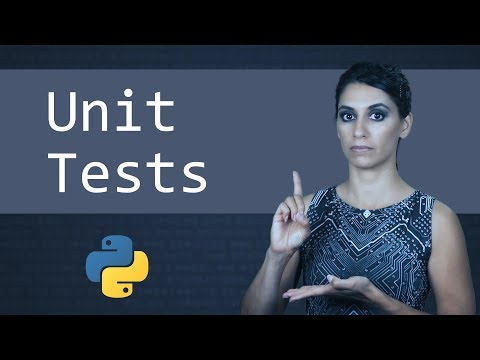

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1Lfv5tUGsn8')

In [ ]:
# Let's create the circle class in python
from math import pi

def circle_area(r):
    if type(r) not in [int, float]:
        raise TypeError("The radius must be a non-negative real number.")
    if r < 0:
        raise ValueError("The radius must not be negative.")
    return pi*(r**2) 

In [ ]:
# Now let's write unit tests for this class
class TestCircleArea(unittest.TestCase): 
    def test_area(self):
        #Test area when radius >= 0
        self.assertAlmostEqual(circle_area(1), pi)
        self.assertAlmostEqual(circle_area(0), 0)
        self.assertAlmostEqual(circle_area(2.1), pi * 2.1**2)

    def test_values(self):
        #Make sure value errors are raised when necessary
        self.assertRaises(ValueError, circle_area, -2)

    def test_type(self):
        #Make sure type errors are raised when necessary
        self.assertRaises(TypeError, circle_area, 3+5j)
        self.assertRaises(TypeError, circle_area, True)
        self.assertRaises(TypeError, circle_area, "text")

In [ ]:
# run the tests in jupyter notebook
unittest.main(argv=[''], exit=False)

PS: to run the tests in a terminal, save the file with name "TestCircleArea.py", then run:

`python3 TestCircleArea.py`

## The practical

According to class Calculator that was presented above, elaborate at least three unit tests with two assertions. Enjoy!

In [13]:
class CalculatorTestCase(unittest.TestCase):
  def test_add(self):
    result = Calculator.add(4,7)
    self.assertEqual(result, 11)
  #elaborate

In [ ]:
# run the tests in jupyter notebook
unittest.main(argv=[''], exit=False)